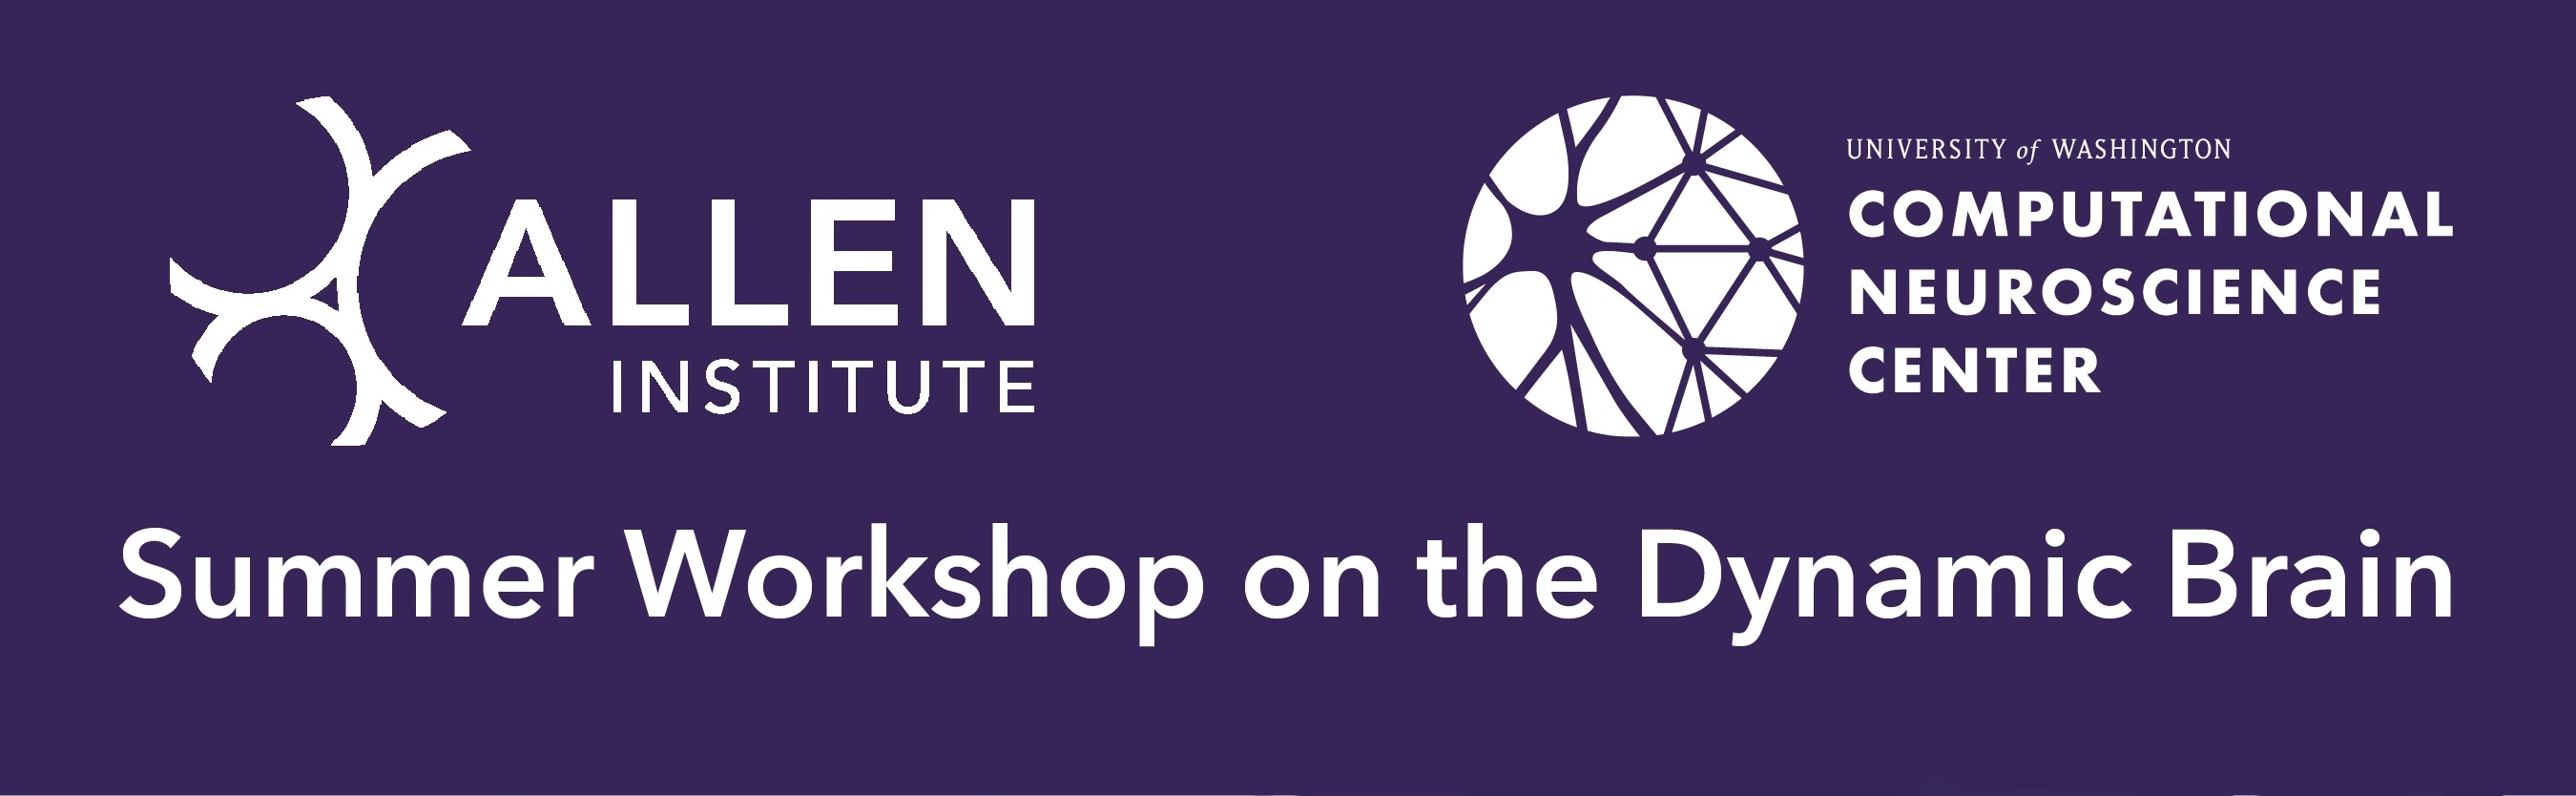

<h1 align="center">DAY 1 Workshop 1 SWDB 2025 </h1> 
<h3 align="center">Monday, August 25, 2025</h3> 
<h3 align="center">Introduction to the SWDB Datasets (pynwb)</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2>Objectives</h2>
    
In this workshop, we will briefly introduce the datasets made available for SWDB, walking through how to load, find, and access key data pieces and metadata. After working through the material, you will learn: 
* how to use AllenSDK and PyNWB to load and access data stored in Neurodata Withou Borders (NWB) files 
* how to use the metadata and the SWDB Data Book to find more information about the datasets  

**Data Access: AllenSDK and pynwb** 
    
The SWDB datasets are packaged as NWB files, a standardized data format for neurophysiology data. We'll show you 2 Python toolkits for accessing NWB files: PyNWB and AllenSDK. PyNWB is the official API for NWB files while the AllenSDK is a Python package developed for accessing Allen Brain Atlas data (including the Brain Observatory datasets). This workshop is split into 2 Code Ocean capsules with the corresponding environment setup and attached datasets for each toolkit. You can use these capsules as templates for your own work, depending on the dataset you choose to work with. 
    
Here, we'll show how to use PyNWB access NWB files and how to use the metadata files. 
    
</div>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h3>PyNWB</h3>

This capsule is focused on how to use the PyNWB to programmatically access data and metadata for the SWDB datasets. We'll explicitly show the data access patterns to load and plot data from one project, but many of the tools are generalizable. For more details on PyNWB, refer to the [documentation](https://pynwb.readthedocs.io/en/stable/).  
    

<h3>SWDB Datasets </h3> 
    
* Brain Computer Interface 2p 
* Dynamic Foraging Behavior
* **Neuropixels Ultra and Psychedelics** 
* V1 Deep Dive 2p & EM 

<h3>Neuropixels (NP) Ultra and Psychedelics</h3>
    
The NP Ultra & Psychedelics dataset was collected to explore how different subtypes of Layer 5 pyramidal neurons (L5p) respond to psilocybin during passive spontaneous activity and visual stimulation. The two subtypes of L5p identified and assessed in these experiments are defined by the transgenes Sim1-Cre_KJ18;Ai32 and Tlx3-Cre_PL56;Ai167 and correspond to thick-tufted extratelencephalic (ET)-projecting and thin-tufted intratelencephalic (IT)-projecting neurons, respectively. These neurons are morphologically distinct: ET neurons generally have more elaborate dendritic arbors and project to subcortical structures such as the basal ganglia, hippocampus, subcortical nuclei, and brainstem. IT neurons have sparser dendritic arbors and signal within the cortex across both intra- and inter-hemispheric cortical areas.

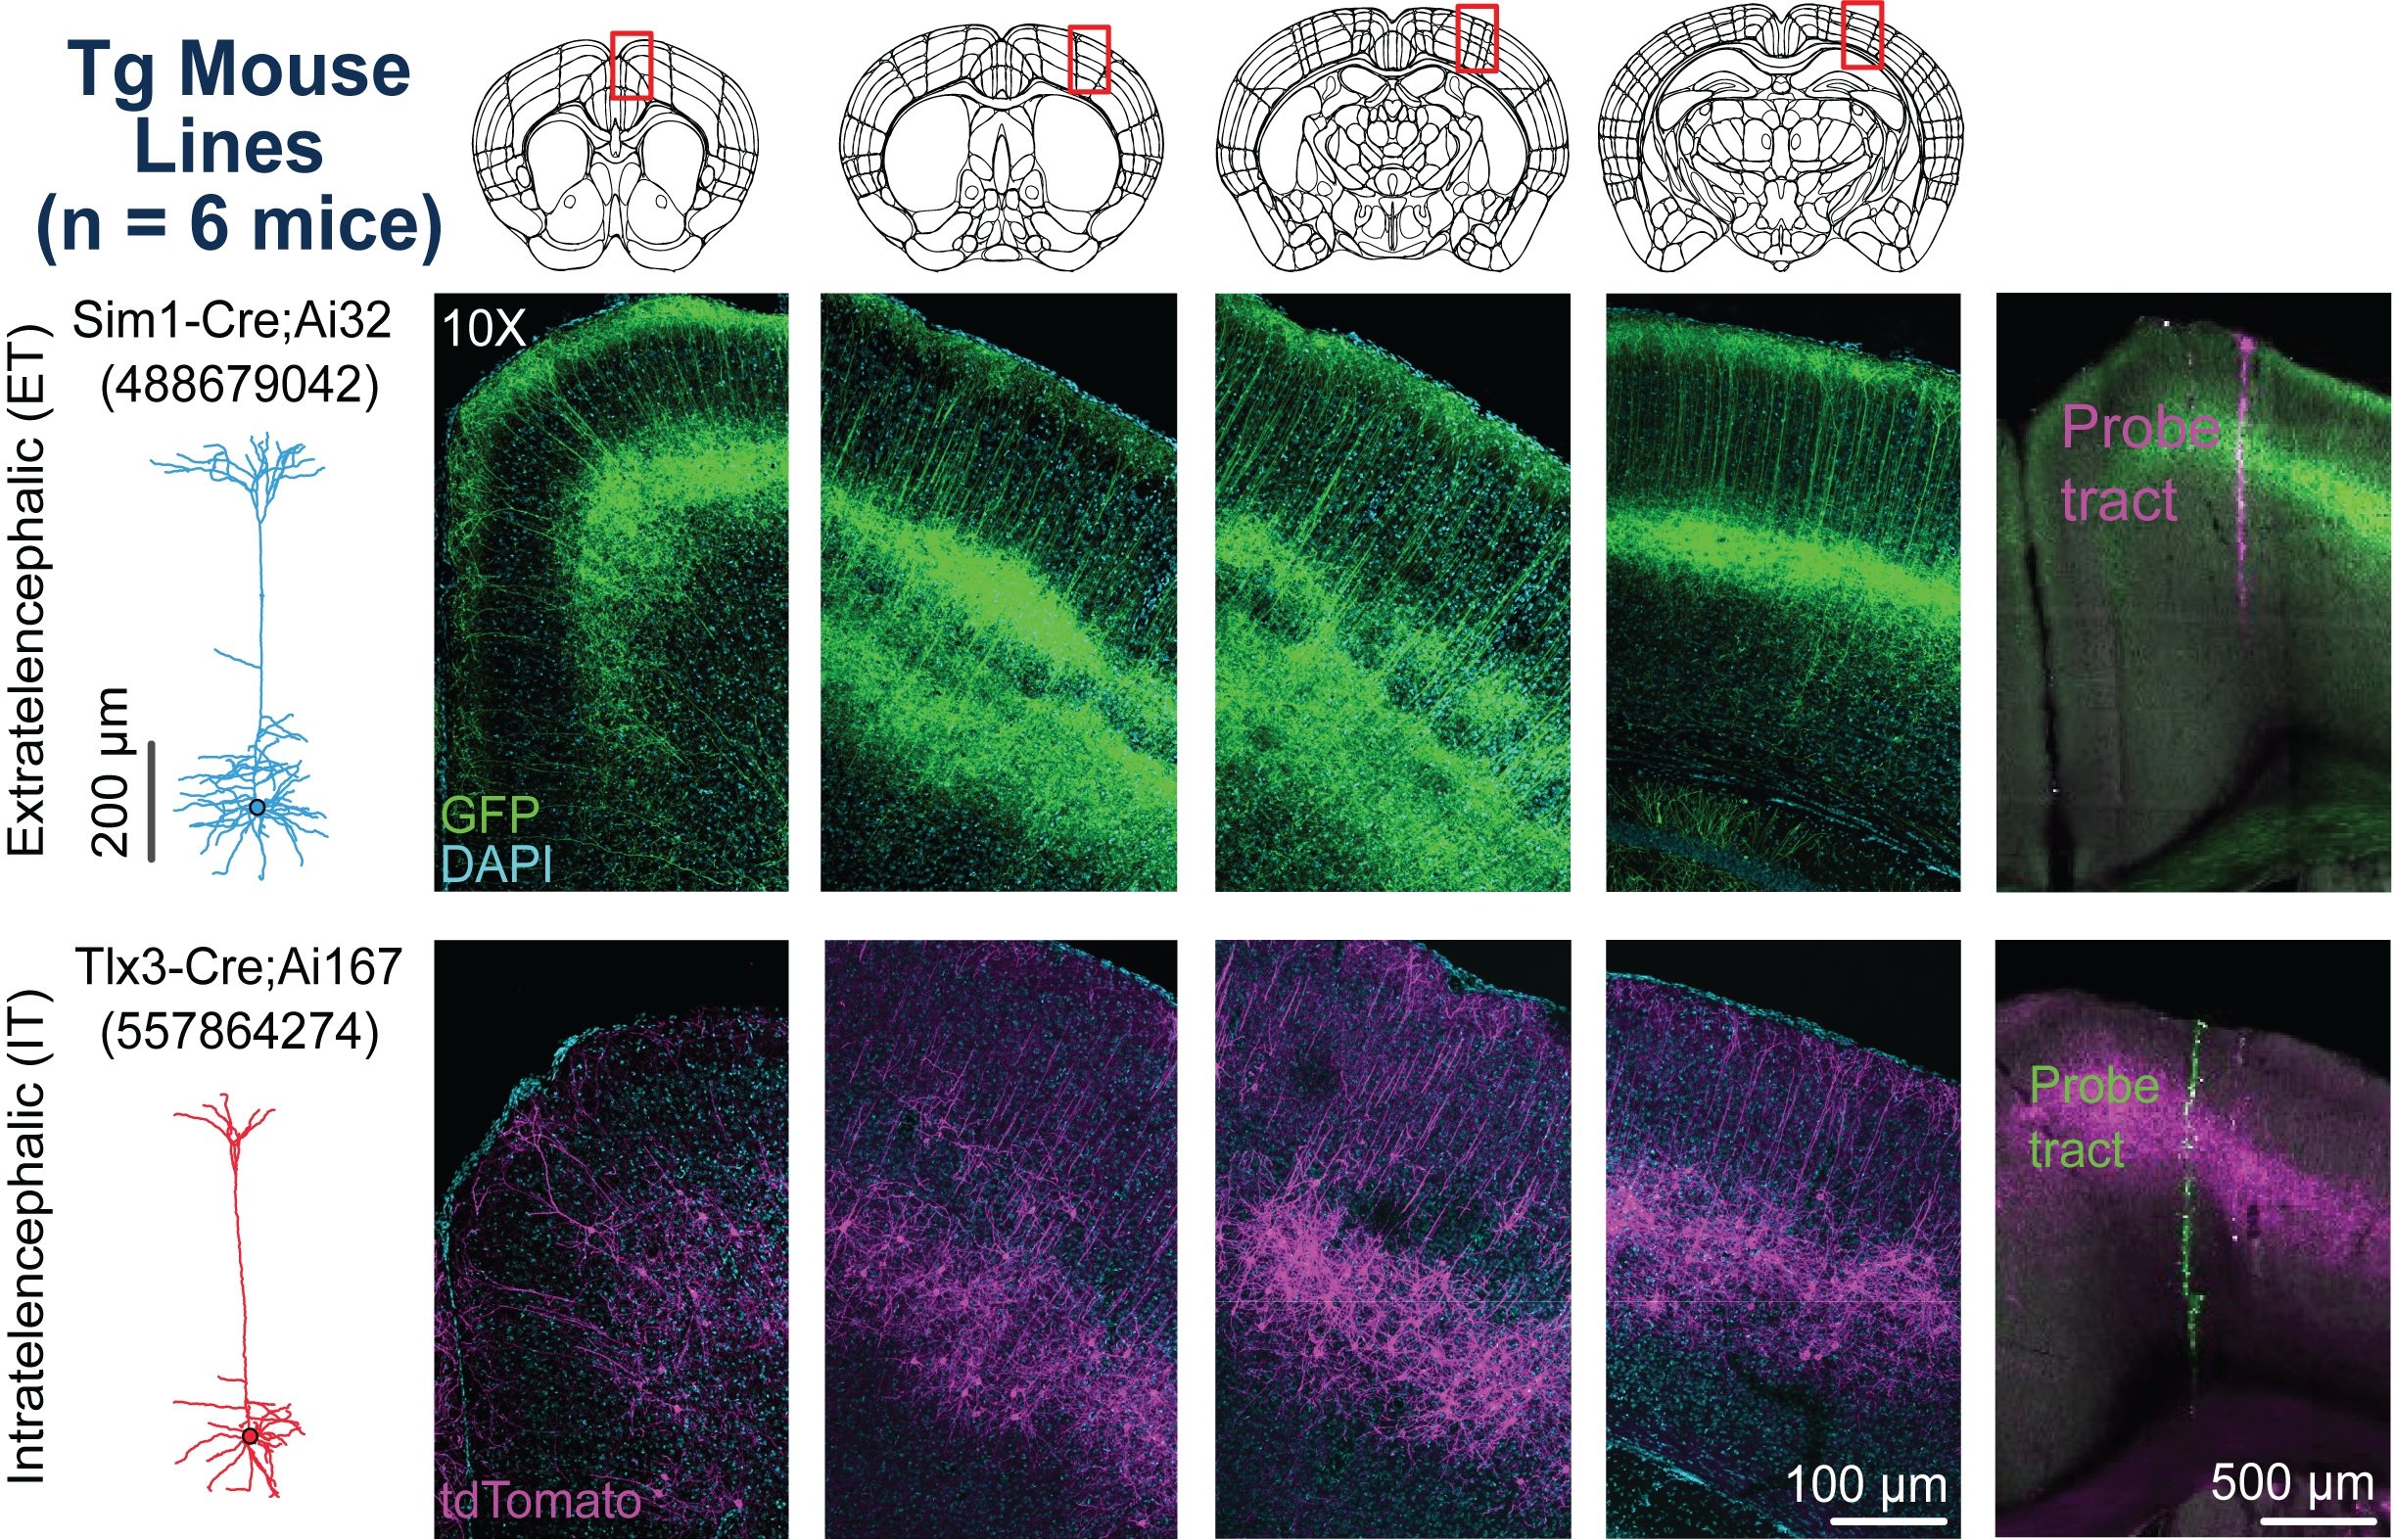
    
<br>
    
L5p neurons were targeted across the brain and identified via optotagging through a whole-hemisphere cranial implant [Bennett 2024](https://doi.org/10.1016/j.neuron.2024.06.015). Recordings were made exclusively in the cortex using four Neuropixels Ultra probes in the 192 x 2 site configuration and covered a range of higher-order, associative, and sensory cortical regions.
    
Individual mice were recorded over two days, one session per day. In the initial session (Day 1), mice were exposed to spontaneous activity (20 minutes), receptive field-mapping (20 minutes), and optotagging (5 minutes) epochs prior to saline (control) injection. Mice were then recorded over two more of these epoch blocks (~45 minutes each) before isoflurane anesthesia administration (1.5% maintainence) was conducted in the final minutes of the experiment with shorter blocks of spontaneous activity and receptive field mapping. The following day (Day 2) adhered to the same experiment structure, now with psilocybin administration (3 mg/kg) and without the final anesthesia epoch. All injections were given as intraperitoneal (IP) injections and isoflurane was given as a vapor with 4% induction.

<br> 
    
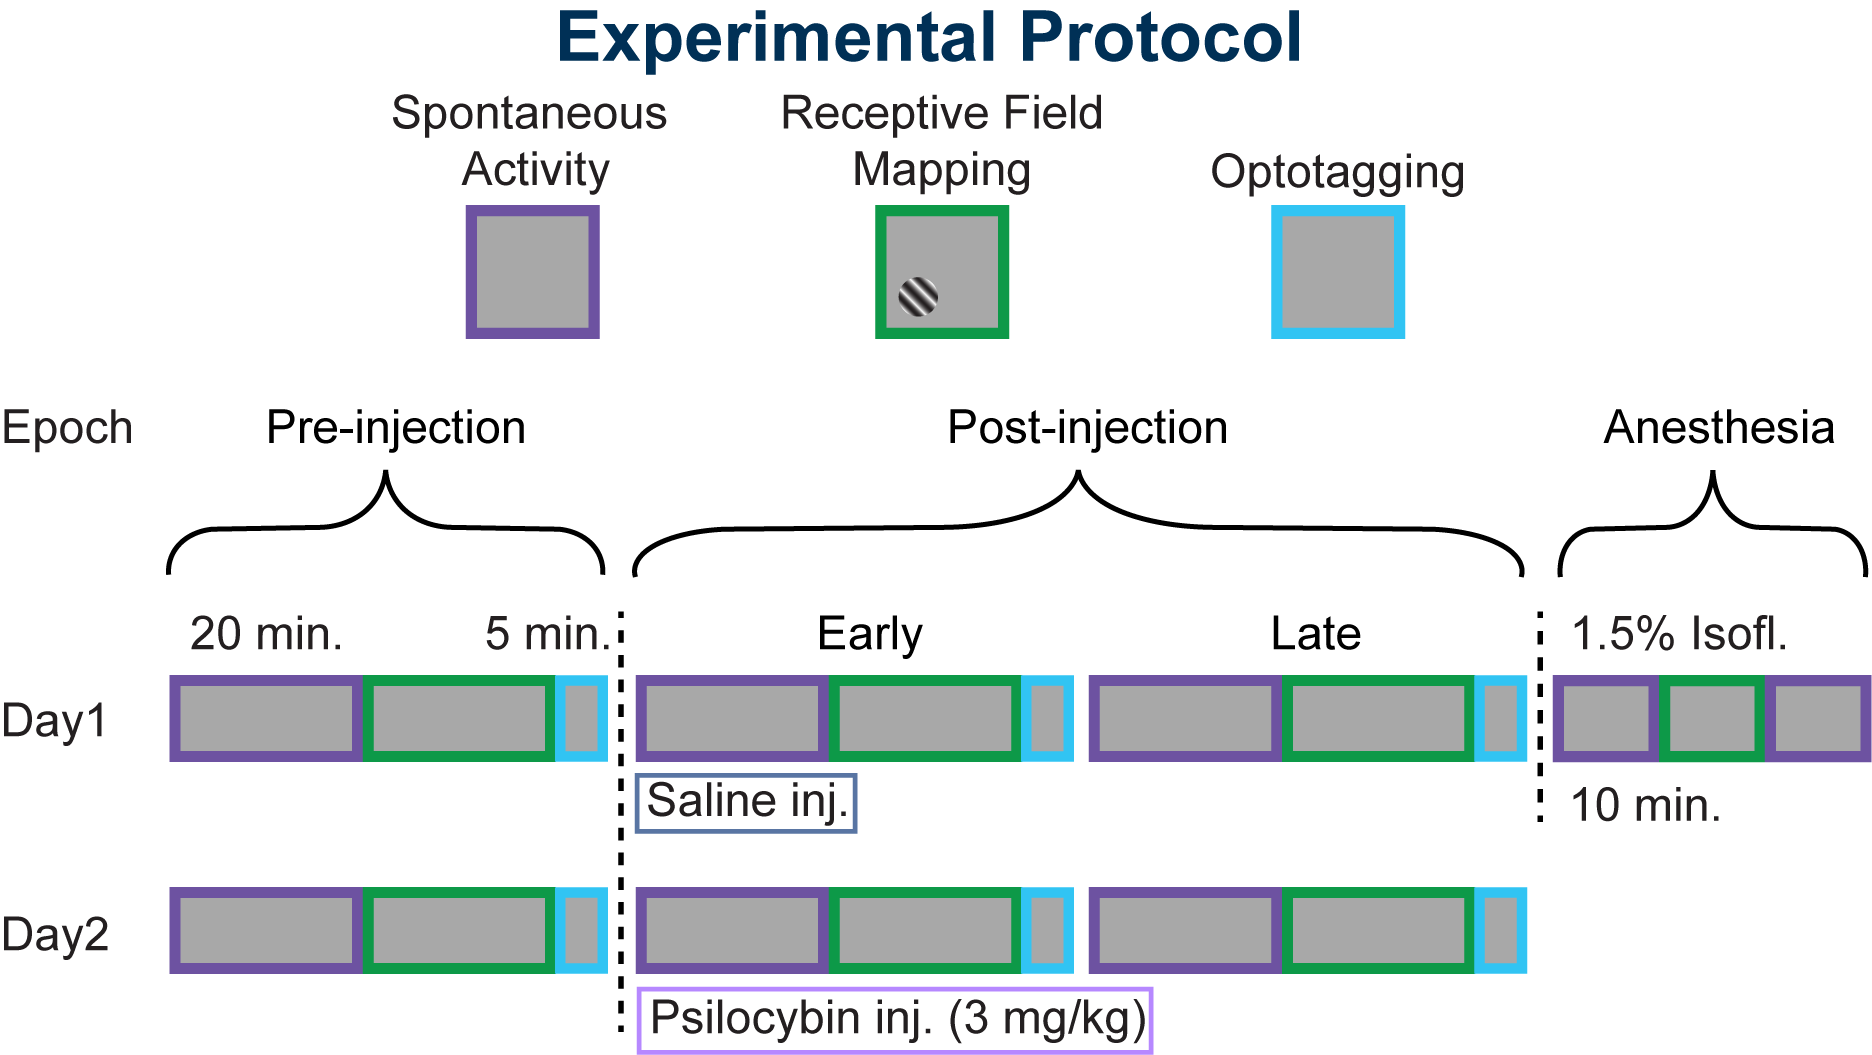

<br>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Summer Workshop on the Dynamic Brain Data Book </h2> 

The databook is a resource for understanding the various dimensions of the datasets, the methods used, and how to access the data. You can find the pages for NP Ultra and Psychedelics project here: [insert link]



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Import packages

In [1]:
# general imports 
import os
import hdmf
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

# nwb specific imports 
import pynwb
from nwbwidgets import nwb2widget
from hdmf_zarr import NWBZarrIO 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Metadata </h2>

Before getting into the data, it's useful to look at the metadata to find relevant information about the experimental session. Every dataset has a project_metadata.csv file in the /data/metadata folder. Let's import it as a pandas DataFrame. 

**Note:** Each dataset contains rich metadata in the form of json files attached to each asset. We pre-generated the project metadata CSVs with simplified information derived from our metadata database using DocDB queries (and some further pandas DataFrame editing). You can see how these CSVs were generated by looking at the python notebooks in the /code/metadata folder. If there are further fields that you would like to pull from the database, try modifying the metadata code yourself! 

In [2]:
# Load metadata CSV 
metadata = pd.read_csv('/data/metadata/npultra_metadata.csv', index_col = False) 
metadata.head()

_id  \
0  916393f2-7009-421a-bde7-bbaf95416937   
1  8a00ee0c-c470-43c5-b24c-52c1785bee3c   
2  c867ad1e-bd84-42df-b863-1244a2fcc957   
3  48c07938-c41b-4cd6-b9e6-c25c0a90aedb   
4  f6792a6f-e70b-4d42-b0b0-9007adc65775   

                                                name  subject_id  \
0  ecephys_714527_2024-05-14_13-22-07_nwb_2025-08...      714527   
1  ecephys_714527_2024-05-15_13-00-23_nwb_2025-08...      714527   
2  ecephys_714789_2024-05-16_13-16-59_nwb_2025-08...      714789   
3  ecephys_714789_2024-05-17_11-47-07_nwb_2025-08...      714789   
4  ecephys_717033_2024-06-04_13-01-40_nwb_2025-08...      717033   

                                            genotype date_of_birth     sex  \
0     Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    2023-11-30  Female   
1     Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    2023-11-30  Female   
2     Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    2023-12-01  Female   
3     Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    2023-12-01  Female   
4  Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL...    2023-12-18    Male   

  session_type                      session_time  \
0       saline  2024-05-14T10:25:34.114677+00:00   
1   psilocybin  2024-05-15T10:43:35.535979+00:00   
2       saline  2024-05-16T10:26:41.826355+00:00   
3   psilocybin  2024-05-17T09:26:22.868269+00:00   
4       saline  2024-06-04T10:11:23.881625+00:00   

                                     stimulus_epochs  \
0  ['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...   
1  ['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...   
2  ['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...   
3  ['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...   
4  ['Spontaneous_0', 'RFMapping_0', 'OptoTagging_...   

                project_name                         modality  \
0  NP Ultra and Psychedelics  Extracellular electrophysiology   
1  NP Ultra and Psychedelics  Extracellular electrophysiology   
2  NP Ultra and Psychedelics  Extracellular electrophysiology   
3  NP Ultra and Psychedelics  Extracellular electrophysiology   
4  NP Ultra and Psychedelics  Extracellular electrophysiology   

                                               notes  \
0  ['Saline injection occurred ~5 min after this ...   
1  ['Psilocybin injection (3 mg/kg) occurred ~1 m...   
2  ['Saline injection occured ~1 min after this s...   
3  ['Psilocybin injection (3 mg/kg) occurred ~1 m...   
4  ['Saline injection occurred ~1 minute after th...   

                                experimental_purpose  \
0  A study on the effect of psilocybin on neocort...   
1  A study on the effect of psilocybin on neocort...   
2  A study on the effect of psilocybin on neocort...   
3  A study on the effect of psilocybin on neocort...   
4  A study on the effect of psilocybin on neocort...   

                                      stimulus_types  
0  ['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...  
1  ['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...  
2  ['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...  
3  ['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...  
4  ['Anesthesia' 'Injection' 'OptoTagging' 'RFMap...

In [3]:
metadata.columns

Index(['_id', 'name', 'subject_id', 'genotype', 'date_of_birth', 'sex',
       'session_type', 'session_time', 'stimulus_epochs', 'project_name',
       'modality', 'notes', 'experimental_purpose', 'stimulus_types'],
      dtype='object')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What modality was used?
</div>

In [4]:
metadata.modality.unique()

array(['Extracellular electrophysiology'], dtype=object)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many mice were used in this dataset?
</div>

In [5]:
len(metadata.subject_id.unique())

6

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many sessions? How many sessions per mouse? 
</div>

In [6]:
len(metadata.name.unique())

12

In [7]:
metadata['subject_id'].value_counts()

subject_id
714527    2
714789    2
717033    2
717036    2
729461    2
730049    2
Name: count, dtype: int64

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What transgenic lines were used in this dataset? 
    
What cell types do these transgenic lines target? Refer to the [Data Book](https://allenswdb.github.io/background/transgenic-tools.html) for this. 
</div>

In [8]:
metadata.genotype.unique().tolist()

['Sim1-Cre_KJ18/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'Tlx3-Cre_PL56/wt;Ai167(TIT2L-ChrimsonR-tdT-ICL-tTA2)/wt']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What stimuli were used? 
</div>

In [9]:
metadata.stimulus_types.unique()

array(["['Anesthesia' 'Injection' 'OptoTagging' 'RFMapping' 'Spontaneous']"],
      dtype=object)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Stimuli and Manipulations</h2>
    
Stimuli: mice were exposed to mean luminance (spontaneous activity) and Gabor patches visual stimuli (RFMapping or Receptive Field Mapping) and photostimulation (OptoTagging) multiple times throughout the experiment.
    
These animals were injected with saline or psilocybin, to study the effects of psychedelics on L5 pyramidal neurons. To find more information on the injection type and concentration, take a look at the `session_type`, `stimulus_epochs`, and `notes` field in the metadata table.
    
Refer to the Data Book [INSERT LINK] for more information on the stimuli. 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** Look at the `session_type`, `stimulus_epochs`, and `notes` columns for a 1 saline injection session and 1 psilocybin injection session. 
</div>

In [10]:
metadata.session_type[0]

'saline'

In [11]:
metadata.stimulus_epochs[0]

"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_0', 'Injection', 'Spontaneous_1', 'RFMapping_1', 'OptoTagging_1', 'Spontaneous_2', 'RFMapping_2', 'OptoTagging_2', 'Anesthesia', 'Spontaneous_3', 'RFMapping_3', 'Spontaneous_4']"

In [12]:
metadata.notes[0]

"['Saline injection occurred ~5 min after this script finished running.', '', 'anesthesia (1.5% isoflurane) began ~1 minute after this stimulus epoch ended', '', '', '', 'anesthesia (1.5% isoflurane) ended ~1 minute after this stimulus epoch ended.', 'low-luminance black screen', 'low-luminance black screen', 'low-luminance black screen', 'low-luminance black screen', 'low-luminance black screen']"

In [13]:
metadata.session_type[1]

'psilocybin'

In [14]:
metadata.stimulus_epochs[1]

"['Spontaneous_0', 'RFMapping_0', 'OptoTagging_0', 'Injection', 'Spontaneous_1', 'RFMapping_1', 'OptoTagging_1', 'Spontaneous_2', 'RFMapping_2', 'OptoTagging_2']"

In [15]:
metadata.notes[1]

"['Psilocybin injection (3 mg/kg) occurred ~1 min after this script finished running.', '', '', '', '', '', 'low-luminance black screen', 'low-luminance black screen', 'low-luminance black screen']"

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Select a session file</h2>
    
Using the metadata DataFrame, let's select a session of interest and load the NWB file.

In [16]:
# Select a session of interest and store the subject id and date 
filtered_metadata = metadata[metadata.session_type == 'psilocybin']

# For the first mouse, store the subject id and year, month, and date  
subject_id = filtered_metadata['subject_id'].iloc[0]

# Save just the year, month, and date for the 3rd session from this mouse
date = filtered_metadata.iloc[0].session_time[0:10] 
print('mouse_id:',subject_id, 'date:', date)

# Find the folder path to the session data we selected 
data_folder = [folder for folder in os.listdir(r'/data/np-ultra-psychedelics/') if str(subject_id) in folder and str(date) in folder][0]

# Set the directory to load the file
data_dir = os.path.join(r'/data/np-ultra-psychedelics/', data_folder)

# Now find the NWB file and set the path to load it
nwb_file = [file for file in os.listdir(data_dir) if 'nwb' in file][0]
nwb_path_zarr = os.path.join(data_dir, nwb_file)
print('Found filepath:', nwb_path_zarr) 

mouse_id: 714527 date: 2024-05-15
Found filepath: /data/np-ultra-psychedelics/ecephys_714527_2024-05-15_13-00-23_nwb_2025-08-03_21-11-22/ecephys_714527_2024-05-15_13-00-23_experiment1_recording1.nwb


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Load the NWB file into Python</h2> 
    
#### Neurodata Without Borders (NWB) files

NWB files are a standardized file format for neurophysiology data. They are formatted similarly to hdf5 containers, with data stored using using a directory format. There are "containers" (i.e. directories) that store each type of data.  

The key types of data in an NWB file are: 
* metadata (subject information, recording methodology, devices used, etc.)
* units and analysis tables (data for spike-sorted "units" or individual neurons) 
* stimulus tables (trial information about the stimuli) 
    
The NWB files are in ZArray (Zarr) format. To load the files into Python, we'll use `NWBZarrIO` from `hdmf_zarr`, which handles Zarr objects in NWB format, like so. 

In [17]:
with NWBZarrIO(nwb_path_zarr, mode='r') as io:
    nwbfile_zarr = io.read()

In [18]:
# If data is not Zarr, use NWBHDF5IO from pynwb to load instead 

# from pynwb import NWBHDF5IO 

# # nwbfile_path = ' '

# with NWBHDF5IO(nwbfile_path, mode='r') as io:
#     nwbfile = io.read()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The data contained in the NWB file are attributes of the nwbfile_zarr object. The data is stored as different types of objects, some specific to NWB files, such as DynamicTables. 

In [19]:
## If the dataset is large, the containers can take a long time to render. 
## Another way to inspect the contents of the NWB file 

nwbfile_zarr.fields

{'session_description': 'NWB file generated by AIND pipeline',
 'identifier': '85b0e57c-fb40-40cd-8d9e-4864b142e8b0',
 'session_start_time': datetime.datetime(2024, 5, 15, 13, 0, 23, tzinfo=tzoffset(None, -28380)),
 'timestamps_reference_time': datetime.datetime(2024, 5, 15, 13, 0, 23, tzinfo=tzoffset(None, -28380)),
 'file_create_date': [datetime.datetime(2024, 6, 22, 2, 31, 24, 367844, tzinfo=tzutc())],
 'analysis': {'analysis_table': analysis_table hdmf.common.table.DynamicTable at 0x140581769849408
  Fields:
    colnames: ['ks_unit_id' 'probe' 'probe_type' 'Spontaneous_0_spikes'
   'Spontaneous_1_spikes' 'Spontaneous_2_spikes' 'Spontaneous_3_spikes'
   'Spontaneous_4_spikes' 'RFMapping_0_spikes' 'RFMapping_1_spikes'
   'RFMapping_2_spikes' 'RFMapping_3_spikes' 'mean_waveform'
   'Spontaneous_0_waveform' 'Spontaneous_1_waveform'
   'Spontaneous_2_waveform' 'Spontaneous_3_waveform'
   'Spontaneous_4_waveform' 'RFMapping_0_waveform' 'RFMapping_1_waveform'
   'RFMapping_2_waveform' 'RF

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

`nwb2widget` creates an interactive widget to easily explore the hierarchical contents of the NWB file. The widget can also render interactive data plots (e.g. calcium activity traces, image segmentation masks). 

In [20]:
nwb2widget(nwbfile_zarr)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h2> Load the neural activity data </h2> 
    
**Units Table**
    
The units table contains spike times and other metrics about the sorted units, individual neurons that have been identified and separated from the recording using spike sorting. Each row is an individual unit and each column is a different metric. The units table is found in the units container of the NWB file. 
    
Containers are accessed via dot (.) notation.
    
to do - add link to data book on columns 

In [21]:
units = nwbfile_zarr.units[:]
units.head()

spike_times  \
id                                                      
0   [860.7809320374699, 1325.947518695973, 1430.58...   
1   [17.43142939500891, 17.468196021101217, 17.526...   
2   [27.352251780071317, 36.339041862565615, 43.51...   
3   [41.37910296719798, 59.87144922636121, 73.4770...   
4   [17.38472944654533, 17.43199606105022, 17.4949...   

                                           electrodes  \
id                                                      
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                        waveform_mean  \
id                                                      
0   [[-0.4310527741909027, 0.0, 0.1539475172758102...   
1   [[-0.636479914188385, 0.0, -1.2869997024536133...   
2   [[-1.995410680770874, 0.0, -1.410410761833191,...   
3   [[-2.2606775760650635, 0.0, -1.893812775611877...   
4   [[-0.8938802480697632, 0.0, -0.425880044698715...   

                                          waveform_sd  \
id                                                      
0   [[21.599468231201172, 0.0, 19.95810890197754, ...   
1   [[15.821245193481445, 0.0, 14.6087064743042, 0...   
2   [[26.957242965698242, 0.0, 24.961811065673828,...   
3   [[33.657691955566406, 0.0, 32.03106689453125, ...   
4   [[16.392057418823242, 0.0, 15.471063613891602,...   

                               unit_name  half_width  nn_hit_rate device_name  \
id                                                                              
0   482f6f21-16d0-4cee-93ed-fd051303051a    0.000257     0.549020      ProbeA   
1   84ac590e-47f9-4c52-aaaa-da99c53606ae    0.000223     0.568389      ProbeA   
2   daf591fc-684f-403a-ab62-3656462428ee    0.000217     0.392670      ProbeA   
3   3c33bff2-f3f8-495e-97ff-635fdf97791c    0.000240     0.181818      ProbeA   
4   8598dc2d-3be4-4704-a1c7-48e2b6a985bc    0.000150     0.626911      ProbeA   

    estimated_x  spread  ...  decoder_probability  ks_unit_id  decoder_label  \
id                       ...                                                   
0         15.97   192.0  ...                 0.94         0.0            mua   
1        -16.05   192.0  ...                 0.59         1.0            mua   
2        -61.38   192.0  ...                 0.85         2.0            mua   
3          6.14   192.0  ...                 0.90         3.0            mua   
4        -20.09   150.0  ...                 0.88         4.0            sua   

    presence_ratio  amplitude_cv_range  drift_std  silhouette  \
id                                                              
0         0.389706                 NaN        NaN    0.260075   
1         1.000000                 NaN        NaN    0.092592   
2         0.720588                 NaN        NaN    0.057229   
3         0.720588                 NaN        NaN    0.012152   
4         1.000000                 NaN  12.551991    0.114247   

    amplitude_median  sync_spike_2  amplitude_cutoff  
id                                                    
0         182.519990      0.052632               NaN  
1          39.780000      0.024288          0.000080  
2          49.140000      0.023973               NaN  
3          80.729996      0.118644               NaN  
4          74.880000      0.021516          0.000043  

[5 rows x 52 columns]

In [22]:
units.columns

Index(['spike_times', 'electrodes', 'waveform_mean', 'waveform_sd',
       'unit_name', 'half_width', 'nn_hit_rate', 'device_name', 'estimated_x',
       'spread', 'isi_violations_count', 'l_ratio', 'isolation_distance',
       'exp_decay', 'num_positive_peaks', 'num_negative_peaks',
       'velocity_above', 'estimated_z', 'peak_trough_ratio', 'sync_spike_4',
       'recovery_slope', 'num_spikes', 'firing_range', 'default_qc',
       'amplitude_cv_median', 'amplitude', 'd_prime', 'repolarization_slope',
       'peak_to_valley', 'sliding_rp_violation', 'isi_violations_ratio',
       'sync_spike_8', 'drift_ptp', 'firing_rate', 'velocity_below', 'snr',
       'rp_contamination', 'rp_violations', 'depth', 'drift_mad',
       'estimated_y', 'nn_miss_rate', 'decoder_probability', 'ks_unit_id',
       'decoder_label', 'presence_ratio', 'amplitude_cv_range', 'drift_std',
       'silhouette', 'amplitude_median', 'sync_spike_2', 'amplitude_cutoff'],
      dtype='object')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
**Exercise:** How many units are in this session? 

In [23]:
len(units)

719

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Spike Times</h2> 
    
Importantly, the `spike_times` column contains time points in which a spike occurred. To plot the neural activity of a single unit, we need to calculate the firing rate from the spike times. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Calculate Firing Rate</h2> 
    
The `calculate_FR` function below will calculate the spike counts and firing rate. 

In [24]:
def calculate_FR(spike_times,bin_size=10):
    """ 
    Calculate spike counts and firing rate from time bins 
    
    Parameters 
    ----------
    spike_times: numpy.ndarray, time points when spikes occurred same unit as bin_size 
    bin_size: float, width of time bin 
    
    Returns 
    --------
    spike_counts: numpy.ndarray, number of spikes in each time bin 
    bin_edges: numpy.ndarray, array of bin edge times 
    firing_rate: numpy.ndarray, firing rate for each bin (spike_counts/bin_size). if bin_size in seconds, firing rate is spikes/sec or Hz. 
    """
    
    # Create time bins that span the full length of spike times 
    t_start = np.floor(spike_times[0])
    t_end = np.ceil(spike_times[-1])
    time_bins = np.arange(t_start, t_end + bin_size, bin_size)
    
    # Count spikes in each time bin 
    spike_counts, bin_edges = np.histogram(spike_times, bins=time_bins)

    # Calculate firing rate
    firing_rate = spike_counts / bin_size
    
    return spike_counts, bin_edges, firing_rate

In [25]:
# Get the spike times for a select unit 
unit_idx = 100
spike_times = units.iloc[unit_idx]['spike_times']

[spike_counts, bin_edges, firing_rate] = calculate_FR(spike_times, bin_size=10) # define 10s time bins 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We'll z-score the data to compare across conditions

In [26]:
def z_score(array):
    z_score = (array - np.nanmean(array)) / np.nanstd(array,ddof=1)
    return z_score

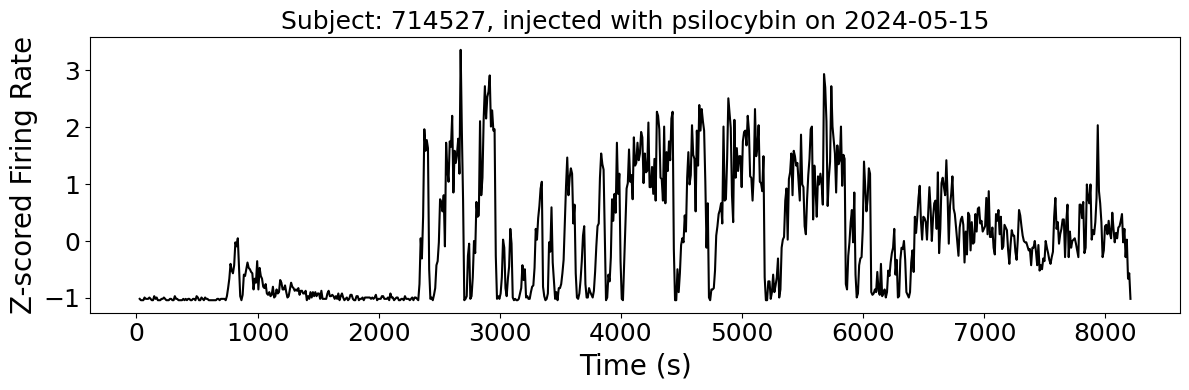

In [27]:
# Plot the firing rate for a single unit across the session

# Get the injection info from the metadata for plot title 
session_id = nwbfile_zarr.session_id
injection_type = metadata[metadata['name'].str.contains(session_id)]['session_type'].unique()[0]

fig,ax = plt.subplots(figsize=(12,4))

ax.plot(bin_edges[:-1], z_score(firing_rate),color='k') # np.histogram adds 1 extra bin edge, so we'll remove 1 
        
ax.tick_params(axis='y',which='major',reset=True,right=False,labelsize=18)
ax.tick_params(axis='x',which='major',reset=True,top=False,labelsize=18)
ax.set_xlabel('Time (s)',fontsize=20)
ax.set_ylabel('Z-scored Firing Rate',fontsize=20)
ax.set_title(f'Subject: {subject_id}, injected with {injection_type} on {date}',fontsize=18)

fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Load the epoch table and extract epoch times </h4>  
    
The epoch table reports the start and stop times for each stimulus epoch in the session. We can overlay the epochs with our plot of neural activity to compare how the firing rate changes in each epoch. 

In [28]:
epochs = nwbfile_zarr.stimulus['epochs'].to_dataframe()
epochs

stim_name  start_time    stop_time
id                                        
0   Spontaneous_0    40.98221  1242.959627
1     RFMapping_0  1253.51491  2455.941363
2   OptoTagging_0  2467.50393  2706.501100
3       Injection  2706.51110  2846.239800
4   Spontaneous_1  2846.24980  4048.293960
5     RFMapping_1  4058.84910  5261.091884
6   OptoTagging_1  5273.65616  5512.558350
7   Spontaneous_2  5522.10880  6724.486726
8     RFMapping_2  6734.49157  7936.617586
9   OptoTagging_2  7948.99745  8187.649770

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot the activity trace relative to epoch timing.</h4>   

In [31]:
def extract_category(stim_name):
    return stim_name.split('_')[0]

# Make a color dictionary to identify stimulus epochs
category_colors = {
    'Spontaneous': '#c49cde',  # purple-ish
    'RFMapping':   '#a9d39e',  # green-ish
    'OptoTagging': '#aee6ed',  # cyan-ish
    'Injection':   '#f4a582'   # orange-ish
}

epochs['category'] = epochs['stim_name'].apply(extract_category) 

epoch_color_dict = {row.stim_name: category_colors[row.category]
              for row in epochs.itertuples(index=False)}

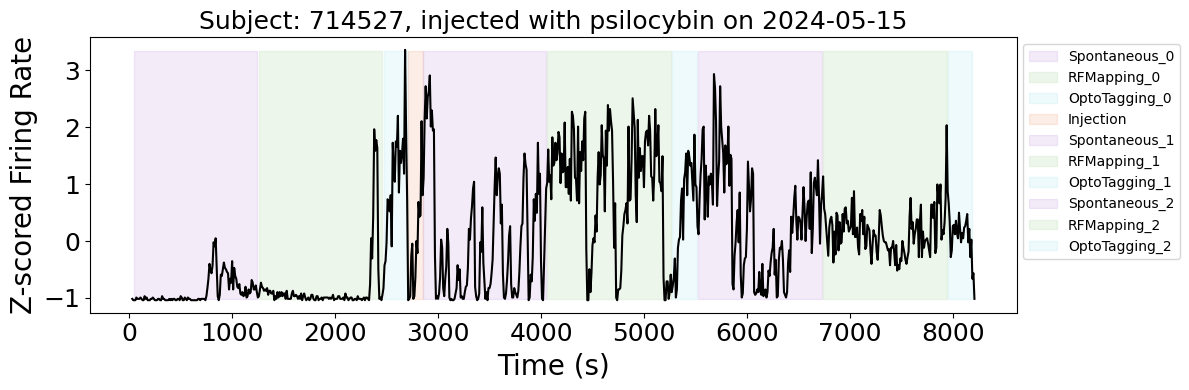

In [32]:
# Plot the firing rate for a single unit across the session with epochs overlaid 

fig,ax = plt.subplots(figsize=(12,4))

# Plot firing rate 
ax.plot(bin_edges[:-1], z_score(firing_rate),color='k') # np.histogram adds 1 extra bin edge, so we'll remove 1 

# Plot epochs. 
for idx,row in epochs.iterrows():
    #Plot the timing of each epoch as a colored span across the x-axis
    ax.axvspan(row['start_time'],row['stop_time'],0.05,0.95,
               color=epoch_color_dict[row['stim_name']],alpha=0.2,zorder=0, label = row.stim_name)

ax.tick_params(axis='y',which='major',reset=True,right=False,labelsize=18)
ax.tick_params(axis='x',which='major',reset=True,top=False,labelsize=18)
ax.set_xlabel('Time (s)',fontsize=20)
ax.set_ylabel('Z-scored Firing Rate',fontsize=20)
ax.set_title(f'Subject: {subject_id}, injected with {injection_type} on {date}',fontsize=18)
ax.legend(bbox_to_anchor=(1.0, 1.0))

fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Analysis Table </h2>
    
The analysis table contains QC'ed and postprocessed units information. Notably, this table contains further information about the putative cell type, optotagged status, region, and layer information for the curated units, quantified using the optotagging responses. 
    
For more information on the analysis table, refer to the Data Book [INSERT LINK]. 

In [33]:
# Load data for all curated units that include things like putative cell type, optotagged status, region, and layer information
analysis_table = nwbfile_zarr.analysis['analysis_table'].to_dataframe() 
analysis_table.head()

ks_unit_id probe                      probe_type  \
id                                                      
350           1     A  Neuropixels Ultra (Switchable)   
351           2     A  Neuropixels Ultra (Switchable)   
352           3     A  Neuropixels Ultra (Switchable)   
353           4     A  Neuropixels Ultra (Switchable)   
354           5     A  Neuropixels Ultra (Switchable)   

                                  Spontaneous_0_spikes  \
id                                                       
350  [41.11226992833221, 41.3126363738815, 41.31283...   
351  [43.51170061373816, 73.44483424725053, 83.9988...   
352  [41.37910296719798, 59.87144922636121, 73.4770...   
353  [41.006003378937564, 41.028736687183226, 41.04...   
354  [86.90411939405645, 147.6591856802338, 179.421...   

                                  Spontaneous_1_spikes  \
id                                                       
350  [2846.700373779901, 2846.903873555326, 2847.07...   
351  [2929.772915437297, 2929.946315245939, 3028.47...   
352  [2911.620335469846, 2954.582488058324, 2960.69...   
353  [2846.310140877215, 2846.3254741936266, 2846.3...   
354  [3348.0570871669183, 3410.4427849869217, 3650....   

                                  Spontaneous_2_spikes  Spontaneous_3_spikes  \
id                                                                             
350  [5523.563186354844, 5523.772719456943, 5525.56...                   NaN   
351  [5525.498517552413, 5530.011012572582, 5531.70...                   NaN   
352  [5531.838343889337, 5578.430625805066, 5623.63...                   NaN   
353  [5522.315921064615, 5522.396220975999, 5522.59...                   NaN   
354  [5647.04928341326, 5647.519949560517, 5686.992...                   NaN   

     Spontaneous_4_spikes                                 RFMapping_0_spikes  \
id                                                                             
350                   NaN  [1254.011364748851, 1255.1815634574607, 1257.1...   
351                   NaN  [1303.9912762594438, 1416.535052060088, 1511.8...   
352                   NaN  [1313.877898682248, 1451.1992804725305, 1459.4...   
353                   NaN  [1253.6788651157858, 1253.7315650576281, 1253....   
354                   NaN  [1265.0223525975118, 1265.3398189138338, 1288....   

                                    RFMapping_1_spikes  ... optotagged  \
id                                                      ...              
350  [4058.995569266862, 4066.4692276858614, 4079.4...  ...          0   
351  [4080.6092454147683, 4235.196274817956, 4295.7...  ...          0   
352  [4066.7330273947414, 4087.219038120433, 4117.8...  ...          0   
353  [4058.8611027485877, 4058.8797360613576, 4058....  ...          0   
354  [4440.927181113891, 4503.954878225406, 5197.83...  ...          0   

     cell_type      spread bAP_extent bAP_attenuation    bAP_idx  burst_idx  \
id                                                                            
350         RS  379.743122      294.0        0.948508  15.454996   0.000077   
351         RS  374.245220      276.0        0.946755  15.217587   0.000000   
352         RS  503.960052      348.0        0.945747  18.880100   0.000000   
353        FSl  336.366188      288.0        0.948941  14.712279   0.000980   
354         RS  359.901768      300.0        0.949907  15.112158   0.000000   

     num_bursts burst_dur burst_proportion  
id                                          
350           2  0.004500         0.000231  
351           0       NaN         0.000000  
352           0       NaN         0.000000  
353         157  0.006001         0.002977  
354           0       NaN         0.000000  

[5 rows x 44 columns]

In [34]:
analysis_table.columns

Index(['ks_unit_id', 'probe', 'probe_type', 'Spontaneous_0_spikes',
       'Spontaneous_1_spikes', 'Spontaneous_2_spikes', 'Spontaneous_3_spikes',
       'Spontaneous_4_spikes', 'RFMapping_0_spikes', 'RFMapping_1_spikes',
       'RFMapping_2_spikes', 'RFMapping_3_spikes', 'mean_waveform',
       'Spontaneous_0_waveform', 'Spontaneous_1_waveform',
       'Spontaneous_2_waveform', 'Spontaneous_3_waveform',
       'Spontaneous_4_waveform', 'RFMapping_0_waveform',
       'RFMapping_1_waveform', 'RFMapping_2_waveform', 'RFMapping_3_waveform',
       'amplitude', 'duration', 'peak_trough_ratio', 'pre_peak_trough_ratio',
       'repolarization_slope', 'recovery_slope', 'avg_ISI', 'baseline_FR',
       'evoked_FR', 'footprint', 'layer', 'region', 'optotagged', 'cell_type',
       'spread', 'bAP_extent', 'bAP_attenuation', 'bAP_idx', 'burst_idx',
       'num_bursts', 'burst_dur', 'burst_proportion'],
      dtype='object')

In [35]:
analysis_table[['ks_unit_id', 'layer', 'region', 'optotagged', 'cell_type']].head()

ks_unit_id layer region  optotagged cell_type
id                                                
350           1  MOs5    MOs           0        RS
351           2  MOs5    MOs           0        RS
352           3  MOs5    MOs           0        RS
353           4  MOs5    MOs           0       FSl
354           5  MOs5    MOs           0        RS

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
**Exercise:** What layers, brain regions, and cell types were recorded from in this dataset? 

In [36]:
analysis_table.layer.unique()

array(['MOs5', 'MOs6a', 'MOs2/3', 'root', 'RSPd5', 'cing', 'RSPd6a',
       'RSPd2/3', 'fp', 'RSPd1', 'VISp6a', 'VISp6b', 'VISp2/3', 'VISp5',
       'VISp4', 'dhc', 'VISp1', 'SSp-bfd2/3', 'SSp-bfd6a', 'SSp-bfd5',
       'SSp-bfd6b', 'SSp-bfd4', 'SSp-bfd1'], dtype=object)

In [37]:
analysis_table.region.unique()

array(['MOs', 'root', 'RSPd', 'cing', 'fp', 'VISp', 'dhc', 'SSp'],
      dtype=object)

In [38]:
analysis_table.cell_type.unique()

array(['RS', 'FSl', 'Sim1', 'FSs'], dtype=object)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Relating the Analysis (Curated Units) Table to the Units Table </h2>
    
The units table contains the spike times across the entire session for all the sorted units. The analysis table contains important information about the cell type and location for a select curation of units based off of the optotagging responses. 
    
We identify the same units across the analysis and the units table using the `ks_unit_id` and the `probe`. 
    
Using the analysis table, select units in MOs that were optotagged during this session. Get all the spikes from the units table. 

In [39]:
region = 'MOs' # filter for (MOs) secondary motor cortex 

optotagged_units = analysis_table[(analysis_table['region']==region)&(analysis_table['optotagged']==1)] #Get optotagged units

unit_ids = optotagged_units['ks_unit_id'].values #Get their unique ids 
probe = optotagged_units['probe'].unique()[0] #Get what probe the they were recorded on

opto_units = units[(units['device_name']==f'Probe{probe}')&(units['ks_unit_id'].isin(unit_ids))] #Get their data from the units table

print(f'Optotagged units in {region}:')
opto_units.head()

Optotagged units in MOs:


spike_times  \
id                                                      
7   [35.05874327545814, 41.39350295130666, 82.9114...   
8   [17.385096112807357, 17.451296039751444, 17.70...   
10  [19.295127338297355, 19.57536036237537, 19.598...   
13  [17.589662553721688, 19.632026966506764, 19.64...   
17  [17.534762614307333, 17.838762278823985, 17.89...   

                                           electrodes  \
id                                                      
7   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
8   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
10  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
13  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
17  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                        waveform_mean  \
id                                                      
7   [[-0.8423997163772583, 0.0, -1.865759968757629...   
8   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
10  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
13  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
17  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                          waveform_sd  \
id                                                      
7   [[24.965770721435547, 0.0, 25.084274291992188,...   
8   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
10  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
13  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
17  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                               unit_name  half_width  nn_hit_rate device_name  \
id                                                                              
7   eaacdcb1-686a-4455-bed5-b239497d1115    0.000313     0.111643      ProbeA   
8   ccedefb3-6468-4394-9ca1-8dce2a7dea7d    0.000173     0.952381      ProbeA   
10  c7eaae41-ff1d-4d4f-8393-a48733294148    0.000353     0.244306      ProbeA   
13  fdc98136-073c-4e74-b92f-d8337bb858d3    0.000250     0.171504      ProbeA   
17  bae92e66-85d0-4a8f-a712-999211daa171    0.000267     0.550538      ProbeA   

    estimated_x  spread  ...  decoder_probability  ks_unit_id  decoder_label  \
id                       ...                                                   
7         40.38   192.0  ...                 0.93         7.0            mua   
8         15.69   120.0  ...                 0.65         8.0            sua   
10        52.38   192.0  ...                 0.72        10.0            mua   
13        43.09   174.0  ...                 0.66        13.0            mua   
17        20.50   192.0  ...                 0.82        17.0            mua   

    presence_ratio  amplitude_cv_range  drift_std  silhouette  \
id                                                              
7         0.875000                 NaN        NaN    0.029039   
8         0.985294                 NaN        NaN    0.169044   
10        1.000000            0.521600  13.462870    0.039162   
13        1.000000            0.296732   8.276151    0.018219   
17        1.000000            1.056308        NaN    0.120309   

    amplitude_median  sync_spike_2  amplitude_cutoff  
id                                                    
7          60.839996      0.069333               NaN  
8         191.879990      0.024300          0.000035  
10         39.780000      0.027053          0.000034  
13         32.760000      0.015977          0.000028  
17         39.780000      0.020260          0.000061  

[5 rows x 52 columns]

In [40]:
# Plot neural activity for a select opto-tagged unit 

# Get the spike times for a select unit in optotagged units 
unit_idx = 6
spike_times = opto_units.iloc[unit_idx]['spike_times']

[spike_counts, bin_edges, firing_rate] = calculate_FR(spike_times, bin_size=10) # define 10s time bins 

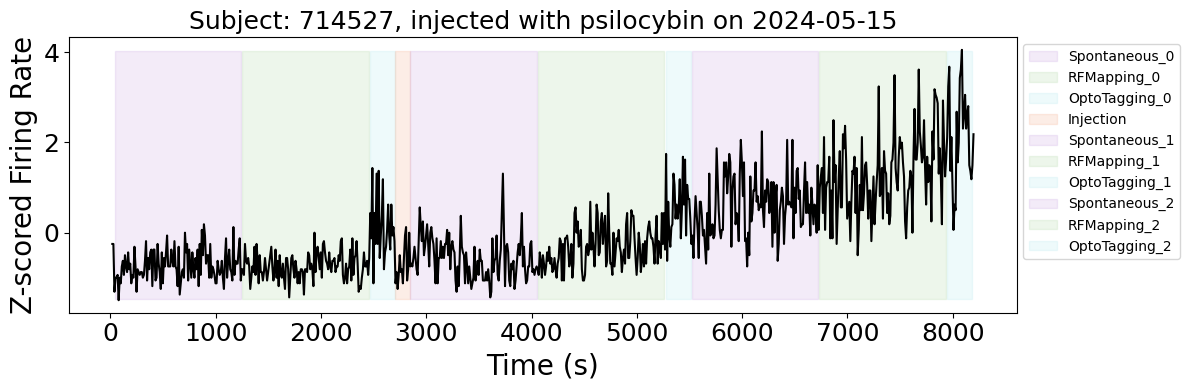

In [41]:
# Plot the firing rate for a single unit in MOs across the session with epochs overlaid 
session_id = nwbfile_zarr.session_id
injection_type = metadata[metadata['name'].str.contains(session_id)]['session_type'].unique()[0]

fig,ax = plt.subplots(figsize=(12,4))

# Plot firing rate 
ax.plot(bin_edges[:-1], z_score(firing_rate),color='k') # np.histogram adds 1 extra bin edge, so we'll remove 1 

# Plot epochs. 
for idx,row in epochs.iterrows():
    #Plot the timing of each epoch as a colored span across the x-axis
    ax.axvspan(row['start_time'],row['stop_time'],0.05,0.95,
               color=epoch_color_dict[row['stim_name']],alpha=0.2,zorder=0, label = row.stim_name)

ax.tick_params(axis='y',which='major',reset=True,right=False,labelsize=18)
ax.tick_params(axis='x',which='major',reset=True,top=False,labelsize=18)
ax.set_xlabel('Time (s)',fontsize=20)
ax.set_ylabel('Z-scored Firing Rate',fontsize=20)
ax.set_title(f'Subject: {subject_id}, injected with {injection_type} on {date}',fontsize=18)
ax.legend(bbox_to_anchor=(1.0, 1.0))

fig.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

Similar to what we did in the AllenSDK tutorial, we can fill out the Dataset Features Spreadsheet to store the information we've found. [Link here](https://docs.google.com/spreadsheets/d/1zwqS97x81jEVUUMTLLtlk6NMMR2C7DhY9nJDB2BLvBE/edit?gid=95746019#gid=95746019). 
    
**Class exercise:** 
    
Split up into groups and select a different dataset attached to this capsule. Using the PyNWB, metadata, and the SWDB Data Book, try to fill out the Dataset Features Spreadsheet with information about your assigned data. At the end, we'll come together and discuss what we've found, what we tried, what was difficult, etc. 

**Further Discussion:** 
    
Select a dataset and discuss: 
1. What interests you about the dataset? What are unique features that distinguish it from others? 
2. What are some scientific questions you could answer with this dataset? What are the next steps you would take to approach the question? 
2. Are there any limitations to consider or uncertainties to verify before working with this dataset? 
</div>